

## Purnima Agarwal
### Grip Internship
#### Prediction using Supervised ML

### We are using Turicreate

In [ ]:
!pip install turicreate

     |████████████████████████████████| 91.9MB 41kB/s 
     |████████████████████████████████| 2.1MB 42.0MB/s 
     |████████████████████████████████| 86.3MB 104kB/s 
     |████████████████████████████████| 20.2MB 1.2MB/s 
     |████████████████████████████████| 3.4MB 26.5MB/s 
     |████████████████████████████████| 3.8MB 28.8MB/s 
     |████████████████████████████████| 450kB 42.0MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-0.4.0
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tenso

In [3]:
import turicreate

### Load the data in a SFrame

In [4]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [5]:
data=turicreate.SFrame.read_csv(url)

Downloading https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv to /var/tmp/turicreate-root/228/e0421e66-0901-4eed-a7c9-35306c4f4660.csv

Finished parsing file https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

Parsing completed. Parsed 25 lines in 0.034695 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

Parsing completed. Parsed 25 lines in 0.015322 secs.

### Explore the data

In [6]:
data

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25


### Importing other important files

In [7]:
import matplotlib.pyplot as plt  
%matplotlib inline

### We plot the trends in the data

Text(0, 0.5, 'Scores')

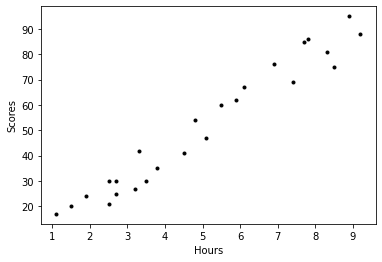

In [12]:
plt.plot(data['Hours'],data['Scores'],'k.')
plt.xlabel('Hours')
plt.ylabel('Scores')


### We split the data into training set and test set

In [17]:
train_data,test_data = data.random_split(.8,seed=0)

### Now we define a simple regression model

In [18]:
def simple_linear_regression(input_feature, output):

  sum_x=sum(input_feature)
  sum_y=sum(output)
  sum_xy=sum(input_feature*output)
  sum_xx=sum(input_feature**2)
  n=len(output)
  slope=(sum_xy-((sum_x*sum_y)/n))/(sum_xx-((sum_x*sum_x)/n))
  intercept=(sum_y/n)-(slope*(sum_x/n))
    
  return (intercept, slope)

### Now we get the slope and intercept

In [24]:
intercept1, slope1 = simple_linear_regression(train_data['Hours'], train_data['Scores'])

print("Intercept: " + str(intercept1))
print("Slope: " + str(slope1))

Intercept: 3.3418640038040976
Slope: 9.59908067839594


### Now we define a function for Prediction

In [25]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values=intercept+(slope*input_feature)
    
    return predicted_values

In [42]:
estimated_score = get_regression_predictions(train_data['Hours'], intercept1, slope1)
print(estimated_score)

[27.339565699793944, 52.29717546362338, 34.0589221746711, 84.9340497701696, 36.93864637818989, 17.74048502139801, 91.65340624504674, 56.136807734981765, 83.01423363449041, 29.259381835473135, 77.25478522745283, 59.97644000634014, 35.018830242510695, 13.90085275003963, 27.339565699793944, 21.58011729275638, 61.896256142019325, 74.37506102393405, 29.259381835473135, 49.417451260104606, 39.81837058170866, 69.57552068473609, 78.21469329529242]


### Comparing between the prediction and acutal values on training set

Text(0, 0.5, 'Scores')

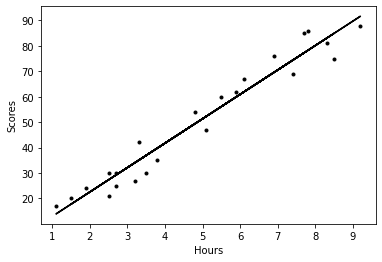

In [47]:
plt.plot(train_data['Hours'],estimated_score,'k-',
         train_data['Hours'],train_data['Scores'],'k.')
plt.xlabel('Hours')
plt.ylabel('Scores')


### Now we make prediction for Ourselves

In [48]:
# On test data
estimated_score = get_regression_predictions(test_data['Hours'], intercept1, slope1)
print(estimated_score)

[46.53772705658582, 88.77368204152796]


In [50]:
hours_studied = 9.25
score_result = get_regression_predictions(hours_studied, intercept1, slope1)
print("The estimated score for hours studied %.2f  is %.2f " % (hours_studied, score_result))

The estimated score for hours studied 9.25  is 92.13 


### Now we evaluate the model by calculating  Residual sum of squares(RSS)

In [36]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
  predicted_values=intercept+(slope*input_feature)
  RSS=sum((predicted_values-output)**2)
    

  return(RSS)

In [49]:
rss = get_residual_sum_of_squares(train_data['Hours'], train_data['Scores'], intercept1, slope1)
print ('The RSS of predicting scores based on hours studied is : ' + str(rss))

The RSS of predicting scores based on hours studied is : 657.432927563798


### The less the RSS, the better is the model !